In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import glob as gb
import cv2
import keras
import io
import typing
from keras import backend
import math
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Dropout, Input, Add,Reshape, Dense, Activation,LSTM, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle
import itertools 

#Model Graphs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install split-folders

In [3]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/kaggle/input/plantvillage-dataset/color/", output="./new",
    seed=1337, ratio=(.9, .07, .03), group_prefix=None, move=False)

Copying files: 54305 files [05:24, 167.21 files/s]


In [4]:
train_path='/kaggle/working/new/train/'
test_path='/kaggle/working/new/test/'
val_path='/kaggle/working/new/val/'

In [5]:
traingen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
testgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
validgen =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

In [6]:
classes=[dir for dir in os.listdir(val_path) if "Tomato" in dir]

In [7]:
classes

['Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Leaf_Mold',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___healthy',
 'Tomato___Target_Spot']

In [8]:
train_ds=traingen.flow_from_directory(batch_size=32,directory=train_path,shuffle=True,
                                                 target_size=(224,224),class_mode='categorical',
                                      classes=[dir for dir in os.listdir(train_path) if "Tomato" in dir]
                                     
                                     )
test_ds=traingen.flow_from_directory(batch_size=32,directory=test_path,shuffle=False,target_size=(224,224), 
                                                 class_mode='categorical',
                                                 classes=[dir for dir in os.listdir(test_path) if "Tomato" in dir]
                                    
                                    )

val_ds=traingen.flow_from_directory(batch_size=32,directory=val_path,shuffle=True,target_size=(224,224), 
                                                 class_mode='categorical',
                                   classes=[dir for dir in os.listdir(val_path) if "Tomato" in dir])

Found 16339 images belonging to 10 classes.
Found 555 images belonging to 10 classes.
Found 1266 images belonging to 10 classes.


In [9]:
from tensorflow.keras.applications import ResNet101V2

base_model = ResNet101V2(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

171317808/171317808 [==============================] - 8s 0us/step


In [10]:
base_model.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                        

In [11]:
from tensorflow.keras import layers, models

global_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(10, activation='softmax')


model = models.Sequential([
    base_model,
    global_layer,
   
    prediction_layer
])

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 42,647,050
Trainable params: 20,490
Non-trainable params: 42,626,560
_________________________________________________________________


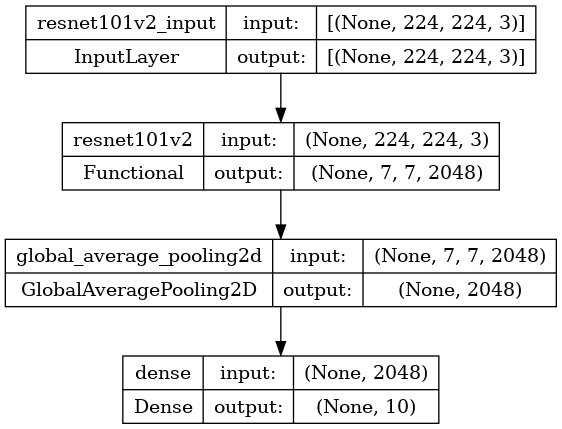

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [15]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(beta_1=0.9,
    beta_2=0.999),
    metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")],
)

In [16]:
history = model.fit(train_ds,validation_data=val_ds,batch_size=32,epochs=30,callbacks=[callback],verbose=1)

Epoch 1/30
511/511 [==============================] - 66s 107ms/step - loss: 0.6529 - accuracy: 0.7927 - val_loss: 0.3875 - val_accuracy: 0.8823
Epoch 2/30
511/511 [==============================] - 52s 102ms/step - loss: 0.3141 - accuracy: 0.9029 - val_loss: 0.3017 - val_accuracy: 0.9076
Epoch 3/30
511/511 [==============================] - 52s 102ms/step - loss: 0.2301 - accuracy: 0.9305 - val_loss: 0.2678 - val_accuracy: 0.9226
Epoch 4/30
511/511 [==============================] - 52s 101ms/step - loss: 0.1878 - accuracy: 0.9444 - val_loss: 0.2302 - val_accuracy: 0.9321
Epoch 5/30
511/511 [==============================] - 52s 102ms/step - loss: 0.1586 - accuracy: 0.9550 - val_loss: 0.2155 - val_accuracy: 0.9392
Epoch 6/30
511/511 [==============================] - 52s 102ms/step - loss: 0.1340 - accuracy: 0.9617 - val_loss: 0.2121 - val_accuracy: 0.9384
Epoch 7/30
511/511 [==============================] - 52s 101ms/step - loss: 0.1169 - accuracy: 0.9701 - val_loss: 0.2230 - val_ac

In [17]:
from tensorflow.keras.utils import to_categorical
y_pred = model.predict_generator(test_ds)
y_pred2= to_categorical(np.argmax(y_pred, axis=1), 10)

y_test= to_categorical(test_ds.labels, 10)

# Using it in AUC
y_pred1=(np.argmax(y_pred, axis=1))
y_test1=(np.argmax(y_test, axis=1))

In [18]:
# Computing the Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
def Accuracy(y_test , y_pred):
    AccScore = accuracy_score(y_test, y_pred, normalize=True)
    return AccScore

In [19]:
#Computing the Precision metric (Some times called Specificity): #(True Positives / float(True Positives + False Posivites))  
def macro_precision(y_test , y_pred):
    PrecisionScore = precision_score(y_test, y_pred, average='macro') 
    return PrecisionScore

In [20]:
#Computing the Recall Score : (Some times called Sensitivity) (TP / float(TP + FN))   1 / 1+2  
def macro_recall(y_test , y_pred):
    RecallScore = recall_score(y_test, y_pred, average='macro') 
    return  RecallScore

In [21]:
#Computing the F1 Score  : 2 * (precision * recall) / (precision + recall)
def macro_F1Score(y_test , y_pred):
    F1Score = f1_score(y_test, y_pred, average='macro') 
    return F1Score

In [22]:
from sklearn.metrics import roc_auc_score

# Calculating Area under the curve
def AUC(actual_class, pred_class, average = "micro"):
    
    #Making a set of all the unique classes 
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #Making a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #Making the current class with label 1 and all other classes as a label 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        # Calculating the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [23]:
print("***** Model Evaluations Details ******** \n")
print("Test loss, Test acc : " , model.evaluate_generator(test_ds)) 
print("******************************")
print("Accurayc  : " , Accuracy(test_ds.classes , y_pred1)) 
print("******************************")
print("Precision Score is : " , macro_precision(test_ds.classes , y_pred1))
print("******************************")
print("Recall Scores is : " , macro_recall(test_ds.classes , y_pred1))
print("******************************")
print('F1 Score is : ', macro_F1Score(test_ds.classes , y_pred1))
print("******************************")
print('AUC Score is : ' , AUC(test_ds.classes, y_pred1))

***** Model Evaluations Details ******** 

Test loss, Test acc :  [0.23984301090240479, 0.9369369149208069]
******************************
Accurayc  :  0.9369369369369369
******************************
Precision Score is :  0.925557726543192
******************************
Recall Scores is :  0.9169945834871067
******************************
F1 Score is :  0.9204642207265673
******************************
AUC Score is :  {0: 0.8942857142857142, 1: 0.9526363636363636, 2: 0.9295238095238094, 3: 0.9293884220354809, 4: 0.9583333333333333, 5: 0.9759026687598117, 6: 0.9614930965100948, 7: 0.9869239468476109, 8: 0.9980237154150198, 9: 0.9631631540697674}


In [24]:
labels=["Class 0","Class 1","Class 2","Class 3","Class 4","Class 5","Class 6","Class 7","Class 8","Class 9"]

In [25]:
print(classification_report(test_ds.classes, y_pred1,target_names=labels))


              precision    recall  f1-score   support

     Class 0       0.80      0.80      0.80        30
     Class 1       0.82      0.93      0.87        55
     Class 2       0.87      0.87      0.87        30
     Class 3       0.96      0.86      0.91        51
     Class 4       1.00      0.92      0.96        12
     Class 5       0.98      0.95      0.97        65
     Class 6       0.93      0.93      0.93        58
     Class 7       0.98      0.98      0.98       162
     Class 8       0.96      1.00      0.98        49
     Class 9       0.95      0.93      0.94        43

    accuracy                           0.94       555
   macro avg       0.93      0.92      0.92       555
weighted avg       0.94      0.94      0.94       555



In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.style.library['seaborn-whitegrid']

RcParams({'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.grid': True,
          'axes.labelcolor': '.15',
          'axes.linewidth': 1.0,
          'figure.facecolor': 'white',
          'font.family': ['sans-serif'],
          'font.sans-serif': ['Arial',
                              'Liberation Sans',
                              'DejaVu Sans',
                              'Bitstream Vera Sans',
                              'sans-serif'],
          'grid.color': '.8',
          'grid.linestyle': '-',
          'image.cmap': 'Greys',
          'legend.frameon': False,
          'legend.numpoints': 1,
          'legend.scatterpoints': 1,
          'lines.solid_capstyle': <CapStyle.round: 'round'>,
          'text.color': '.15',
          'xtick.color': '.15',
          'xtick.direction': 'out',
          'xtick.major.size': 0.0,
          'xtick.minor.size': 0.0,
          'ytick.color': '.15',
          'ytick.direct

In [27]:
def plot_roc_curve(y_test,y_pred):
    n_classes=10
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw=2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
    plt.figure(figsize=(10, 10))
    plt.plot(fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,)

    plt.plot(fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
    colors = cycle(["aqua", "darkorange", "cornflowerblue",'#9e9e9e','#b19a7e','#CD5C5C','#DFFF00',
                   '#DE3163','#ff4d4d','#CCCCFF','#800080','#4F1D25','#ccffcc','#ff0040'
                   ,'#4000ff','#0080ff','#ff8000','#666600','#b37700','#00b3b3','#003300','#FFC300','#A6F7BD',
                   '#A6BDF7','#CAA6F7','#F7A6AC','#ADF7A6','#F5F7A6','#F7CCA6','#EE4949',
                    '#DEA41F','#334471','#33716F','#343371','#772CE3','#B8BF20','#666B01','#0B6B01',
                    '#F4B708','#179690'
                   ])

    for i, color in zip(range(n_classes), colors):
        plt.plot(
           fpr[i],
           tpr[i],
           color=color,
           lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Compact Roc Curve")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

In [28]:
def Acc_Loss_Graph(history):
    # converting hsitory to dataframe
    pd.DataFrame(history.history)

    pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')

    pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

In [29]:
labels=np.array(["Class 0","Class 1","Class 2","Class 3","Class 4","Class 5","Class 6","Class 7","Class 8","Class 9"])

In [30]:
def Confusion_Matrix(y_test , y_pred):
    fig, ax = plt.subplots(figsize=(15,15))

    #cnf_matrix = confusion_matrix()
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels=labels,ax=ax,xticks_rotation='vertical'
                                                  ,cmap="Blues")

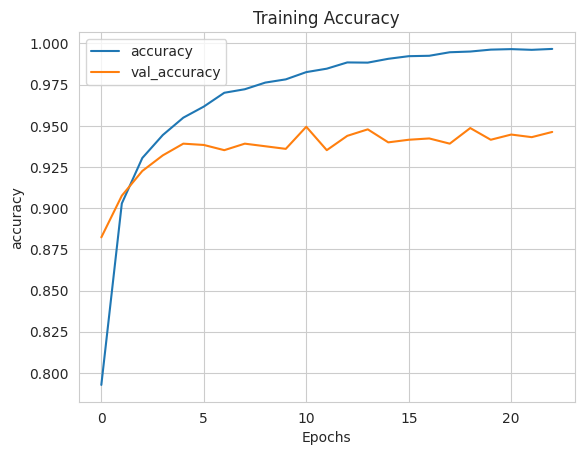

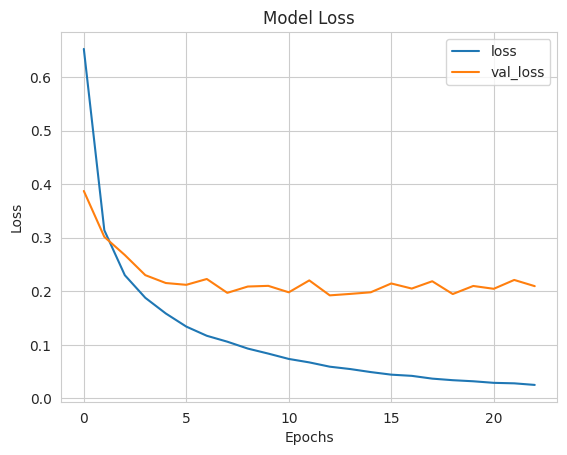

In [31]:
Acc_Loss_Graph(history)

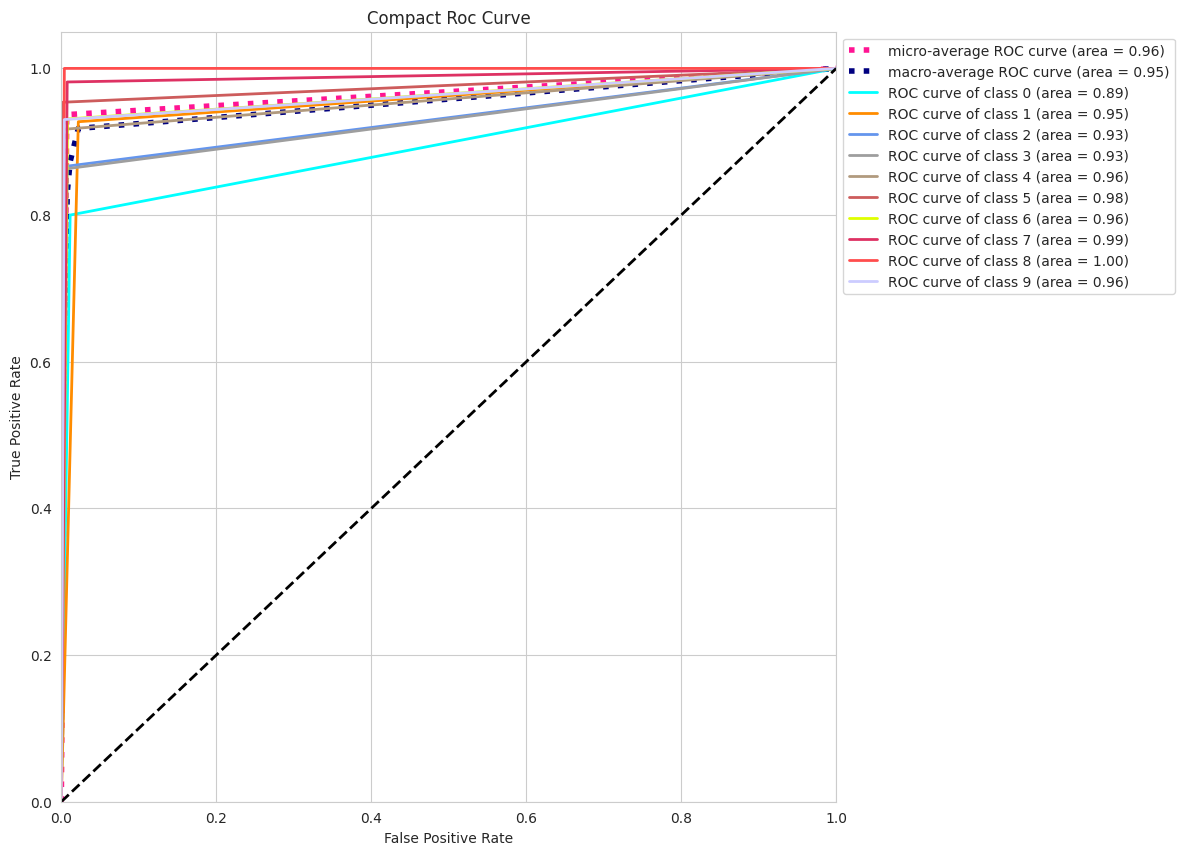

In [32]:
plot_roc_curve(y_test,y_pred2)

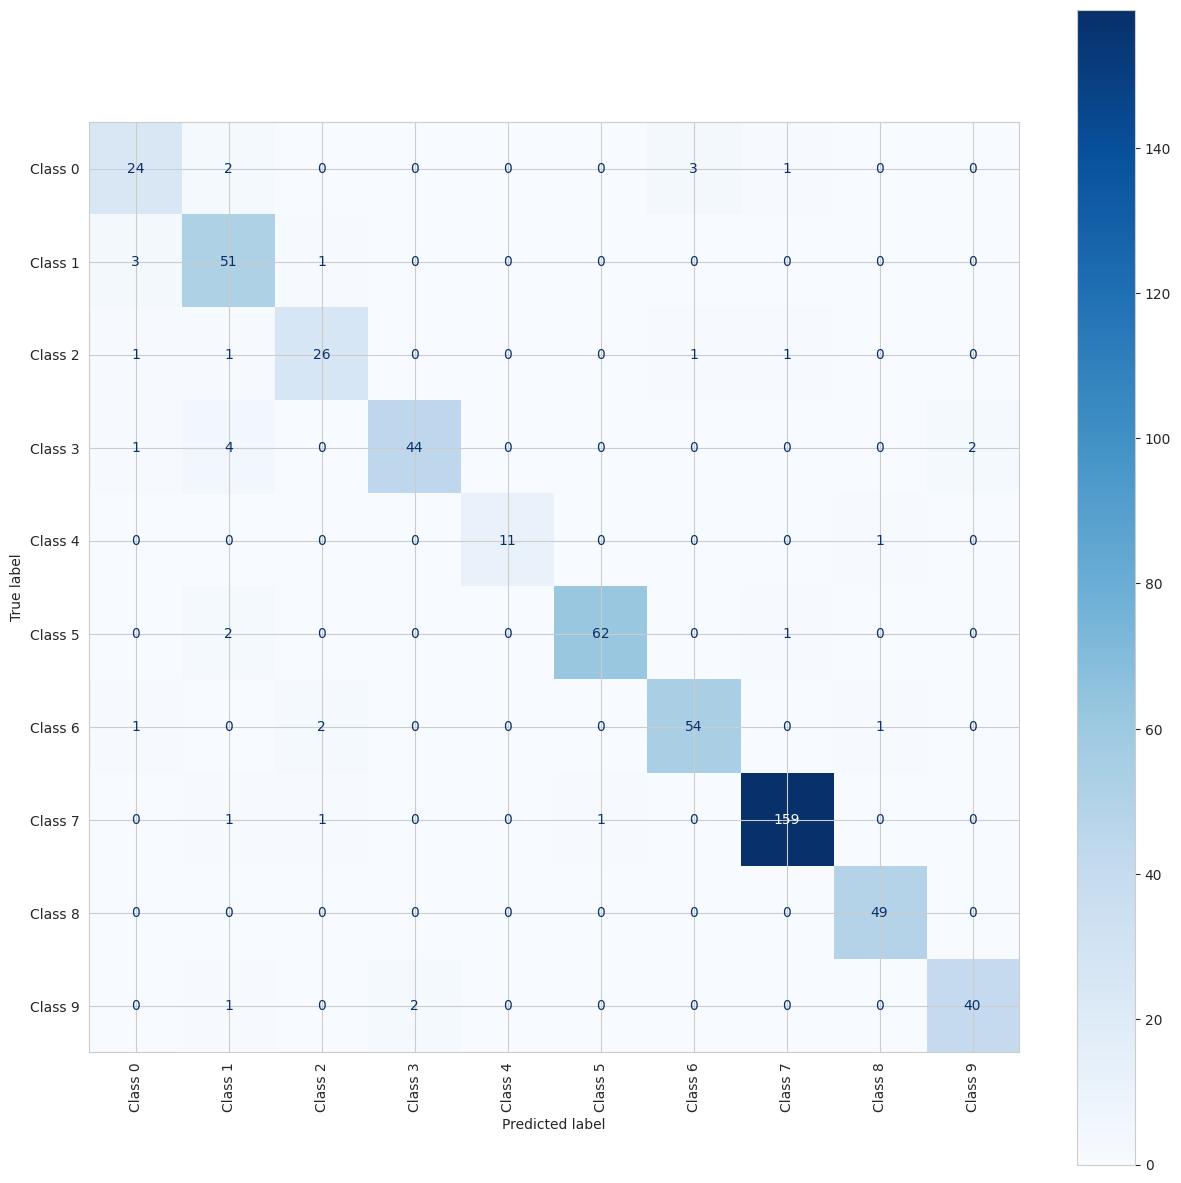

In [33]:
Confusion_Matrix(test_ds.classes , y_pred1)

In [34]:
target_name={0:"Class 0",1:"Class 1",2:"Class 2",3:"Class 3",4:"Class 4",5:"Class 5",6:"Class 6",7:"Class 7",8:"Class 8",9:"Class 9",
    }

In [35]:
from sklearn.manifold import TSNE
tsne1 = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(y_pred)

In [36]:
# create dataframe
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'target'],
                       data=np.column_stack((tsne1, 
                                            y_test1)))# cast targets column to int
cps_df.loc[:, 'target'] = cps_df.target.astype(int)
cps_df.loc[:, 'target'] = cps_df.target.map(target_name)

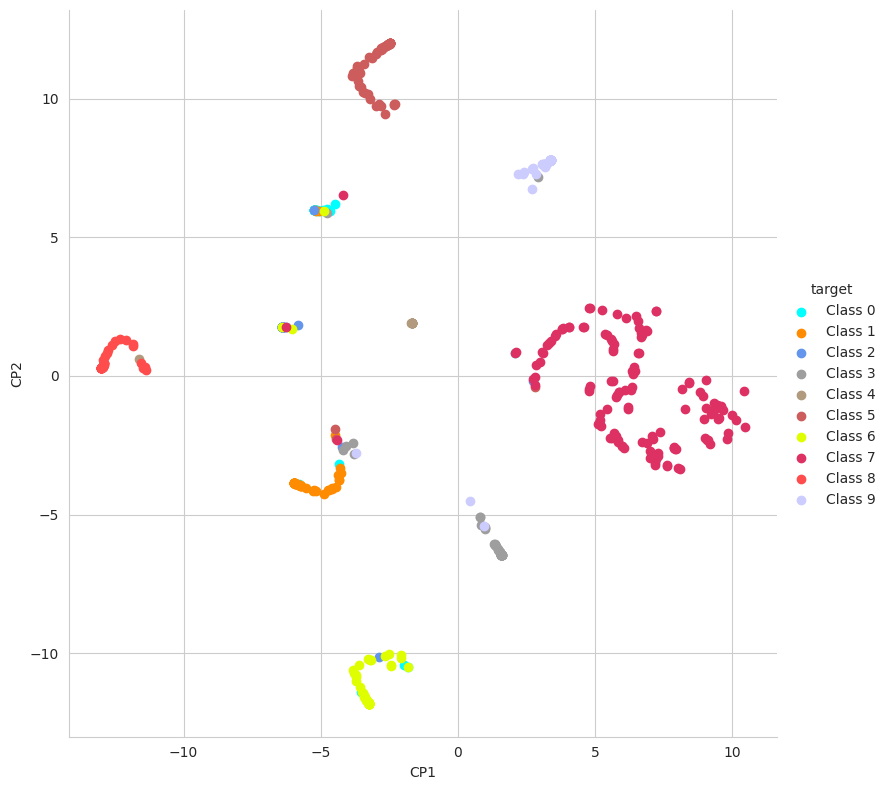

In [37]:
import seaborn as sns
d = {'color': ["aqua", "darkorange", "cornflowerblue",'#9e9e9e','#b19a7e','#CD5C5C','#DFFF00',
                   '#DE3163','#ff4d4d','#CCCCFF','#800080','#4F1D25','#ccffcc','#ff0040'
                   ,'#4000ff','#0080ff','#ff8000','#666600','#b37700','#00b3b3','#003300','#FFC300','#A6F7BD',
                   '#A6BDF7','#CAA6F7','#F7A6AC','#ADF7A6','#F5F7A6','#F7CCA6','#EE4949',
                    '#DEA41F','#334471','#33716F','#343371','#772CE3','#B8BF20','#666B01','#0B6B01',
                    '#F4B708','#179690'] }
grid = sns.FacetGrid(cps_df, hue="target",hue_kws=d, height=8)
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()

In [38]:
model.save_weights('/kaggle/working/model1.h5')